PassengerId ->Her yolcu için farklı yolcu numarasıolduğundan işimize yaramayacaktır
Survived -> Hayatta kalıp kalmadığı bilgisi, 0=Hayır | 1=Evet
Pclass -> Bilet sınıfı, 1=Üst Sınıf | 2= Orta Sınıf / 3=Alt Sınıf
Name -> Yolcuların ismi
Sex -> Yolcuların cinsiyeti, male:Erkek, female:Kadın
Age -> Yolcuların yaşı
SibSp -> Eşe sahip olup olmadığı, 0=Hayır | 1=Evet
Parch -> Çocuğu olup olmadığı, 0-1-2-3-4-5-6
Ticket -> Bilet numarası
Cabin -> Kabin numarası
Embarked -> Gemiye biniş limanı, C=Cherbourg / S=Southampton / Q=Queenstown

In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import sklearn

# Data analysis

In [2]:
data = pd.read_csv("titanic.csv")
df=data.copy()
#In data science, it is common practice to split the dataset into training and testing sets to evaluate the performance of machine learning models.
#The copy of the dataset will be used for this purpose.

In [3]:
df.shape 

(891, 12)

In [4]:
df.head().T #getting the first five rows of a dataset

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
df.tail().T #Displaying the last five rows of a dataset

,886,887,888,889,890
PassengerId,887,888,889,890,891
Survived,0,1,0,1,0
Pclass,2,1,3,1,3
Name,"Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,male,male
Age,27.0,19.0,NaN,26.0,32.0
SibSp,0,0,1,0,0
Parch,0,0,2,0,0
Ticket,211536,112053,W./C. 6607,111369,370376
Fare,13.0,30.0,23.45,30.0,7.75


In [6]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
#Renaming columns in a dataset (Optional)
"""
df=df.rename(columns={"PassengerId":"yolcu_id","Survived":"hayatta_kalma","Pclass":"Ekonomi_sınıfı",
                      "Name":"isim","Sex":"cinsiyet","Age":"yaş","SibSp":"kardeş_sayısı",
                      "Parch":"çocuk_sayısı","Ticket":"bilet","Fare":" bilet_fiyatı","Cabin":"kabin",
                      "Embarked":"biniş_limanı"})
"""

'\ndf=df.rename(columns={"PassengerId":"yolcu_id","Survived":"hayatta_kalma","Pclass":"Ekonomi_sınıfı",\n                      "Name":"isim","Sex":"cinsiyet","Age":"yaş","SibSp":"kardeş_sayısı",\n                      "Parch":"çocuk_sayısı","Ticket":"bilet","Fare":" bilet_fiyatı","Cabin":"kabin",\n                      "Embarked":"biniş_limanı"})\n'

In [9]:
df.isna().values #Missing values may not be fully ımputed here

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [10]:
df.isna().values.any() # Are there any missing values?" and "TRUE" indicates that there are missing values.

True

In [11]:
df.isna().sum() #It shows the total number of missing values in the columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling in missing numerical values

In [13]:
#Fill the missing numerical data types with the mean value
df.fillna(df.mean())
#df['Age'].fillna(df['Age'].median(), inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [14]:
data.Survived.value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
#The number of unique values in the separated groups
for i in df.columns:
    print(("\n{}\n{}\n").format(i,df[i].value_counts()))


PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
Survived
0    549
1    342
Name: count, dtype: int64


Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
Sex
male      577
female    314
Name: count, dtype: int64


Age
Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # Calculate the number of family members
df.groupby('FamilySize')['Survived'].mean() # Calculate the survival rates by family size

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [17]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) #Detect the titles of the passengers

In [18]:
df.groupby('Title')['Survived'].sum().sort_values(ascending=False)
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [19]:
#Calculate the survival rate of each passenger based on their title
df.groupby('Title')['Survived'].mean().sort_values(ascending=False)

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

I am deleting the columns that I think will not be useful for my work

In [20]:
"""Deleting a large number of columns may seem like a mistake at first glance,
but we can look at the unique values in the columns of our dataset to determine whether this process is appropriate.
For instance, some columns such as passenger IDs are unique and cannot be related to any other data. 
Therefore, deleting columns such as passenger ID, cabin, and ticket number may be a reasonable approach. 
The information contained in these columns may not be useful for analysis or cannot be related to data in other columns.
would be the English translation of the given text."""

'Deleting a large number of columns may seem like a mistake at first glance,\nbut we can look at the unique values in the columns of our dataset to determine whether this process is appropriate.\nFor instance, some columns such as passenger IDs are unique and cannot be related to any other data. \nTherefore, deleting columns such as passenger ID, cabin, and ticket number may be a reasonable approach. \nThe information contained in these columns may not be useful for analysis or cannot be related to data in other columns.\nwould be the English translation of the given text.'

In [21]:
df.drop(["FamilySize", "Title", "Cabin", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [22]:
df.head().T 

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


# Filling in missing categorical values

In [23]:
df.head() #We converted the values of male and female for gender into 0 and 1, respectively

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
df["Embarked"] = df["Embarked"].fillna('S')

In [25]:
"""
from sklearn import preprocessing

label_eco =preprocessing.LabelEncoder()
df["Embarked"]=label_eco.fit_transform(df["Embarked"])
"""

'\nfrom sklearn import preprocessing\n\nlabel_eco =preprocessing.LabelEncoder()\ndf["Embarked"]=label_eco.fit_transform(df["Embarked"])\n'

# Data visualization

In [26]:
?sns.clustermap #clustermap key-value parameteres information

Object `sns.clustermap #clustermap key-value parameteres information` not found.


In [27]:
sns.clustermap(df.corr(),annot=True,vmin=-1,vmax=1,figsize=(10,10),dendrogram_ratio=0.4,cmap='YlGnBu')
"""
(EN)Since I set the minimum and maximum values as -1 and 1, I can also examine the correlation relationship. There is a strong negative correlation between fare and pclass (-0.55), meaning that as the economic class increases, the price value also increases.

There is also a strong negative correlation between survived and sex (-0.54), as we changed the categorical data of male (1) and female (0). This means that women were more likely to survive and more of them survived compared to men.

We see that the class of the survivors is also important in correlation with survival (survived and pclass).
(TR)

min ve max değerlerini -1 e 1 olarak belirlediğim için burada aynı zamanda korelasyon ilişkisini de inceleyebiliyorum
(fare ile pclass)=-0.55  aralarında negatif güçlü korelasyon var ekonomi sınıfı arttıkçfiyat değeri artıyor.

(survived ile sex)=-0.54 aralarında negatif güçlü korelasyon var male(1) female(0) olarak kategorik verileri 
değiştirmiştik yani kadınların hayatta kalması daha olası erkeklerden fazla hayatta kalmışlar.

(survived ile pclass)=hayatta kalanların sınıfınında burada önemli olduğunu görüyoruz.
"""

ValueError: could not convert string to float: 'male'

In [ ]:
notnumeric=['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch',  'Fare']

In [ ]:
df["Survived"].value_counts().plot.pie(legend=True,autopct="%5.1f%%") #We see that the number of survivors is low (38%)

<Axes: ylabel='count'>

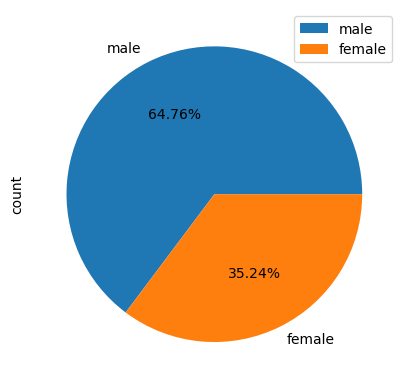

In [28]:
df["Sex"].value_counts().plot.pie(legend=True,autopct="%0.2f%%") #woman(0),man(1) 

<Axes: ylabel='count'>

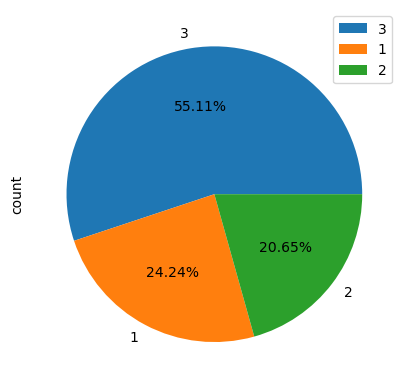

In [29]:
df["Pclass"].value_counts().plot.pie(legend=True,autopct="%0.2f%%")
#Ticket class, 1 Upper Class / 2 Middle Class / 3 Lower Class

<Axes: ylabel='count'>

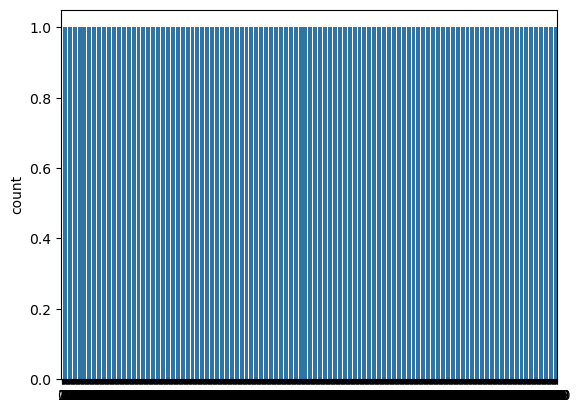

In [30]:
 sns.countplot(df["Survived"]) 

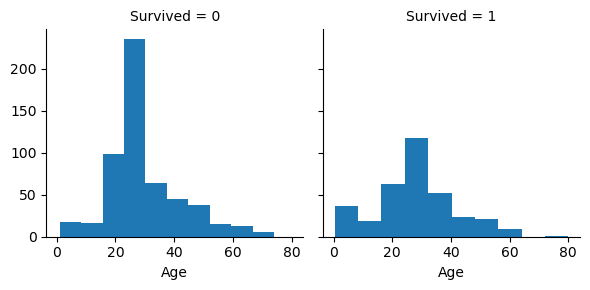

In [31]:
SurvAge = sns.FacetGrid(df, col="Survived")
SurvAge.map(plt.hist, 'Age', bins=10) #More than 200 people have died within the age range of 30.

<Axes: xlabel='Pclass', ylabel='Survived'>

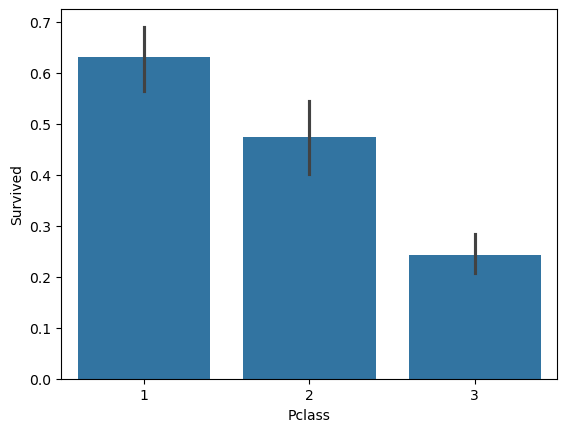

In [32]:
sns.barplot(x = 'Pclass', y = 'Survived', data =df) 
#It has been observed that people who purchase tickets from the lower class have a lower survival rate, whereas those who purchase tickets from the first class have a higher survival rate.

<Axes: ylabel='count'>

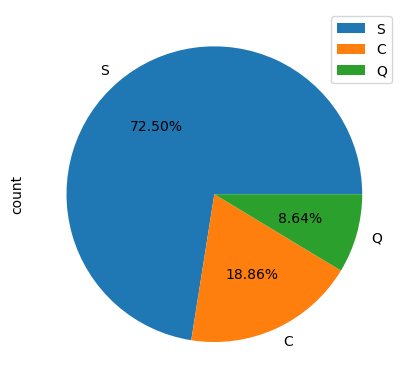

In [40]:
df["Embarked"].value_counts().plot.pie(legend=True,autopct="%0.2f%%")
#Embarked  0=C=Cherbourg \ 2=S=Southampton \ 1=Q=Queenstown

#ağırlık değerleri ve iterasyon içeren x,y grafiğinde eğrimiz 0 dan başalyıp 1000 iterasyondan sonra logaritmik artış gösterip 10 da sabitlendi bunu nasıl yorumlar

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_31955/3509820239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,kde=True,bins=30) #We can see that there are outliers in the age range.


<Axes: xlabel='Age', ylabel='Density'>

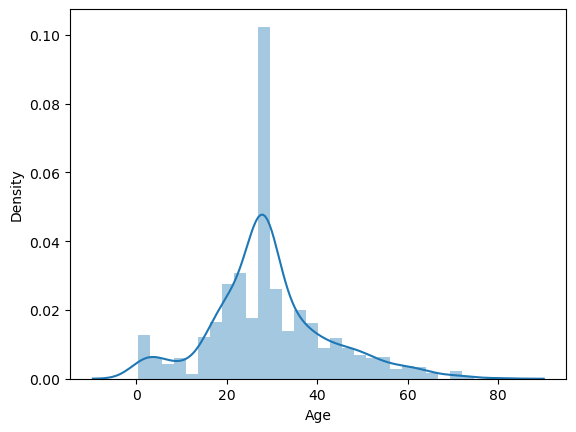

In [41]:
sns.distplot(df.Age,kde=True,bins=30) #We can see that there are outliers in the age range.

<Axes: xlabel='Fare', ylabel='Pclass'>

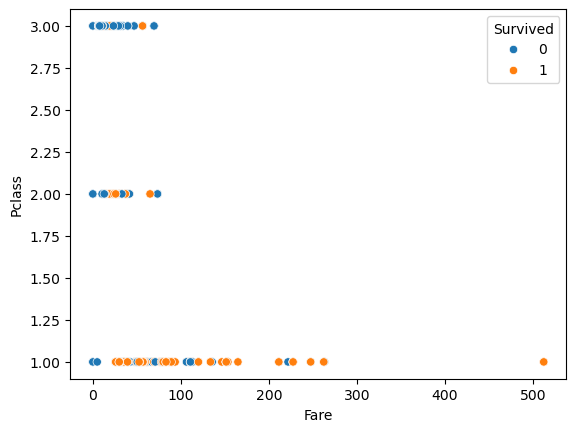

In [42]:
sns.scatterplot(y="Pclass",x="Fare",data=df,hue="Survived")

<Axes: xlabel='Fare', ylabel='Age'>

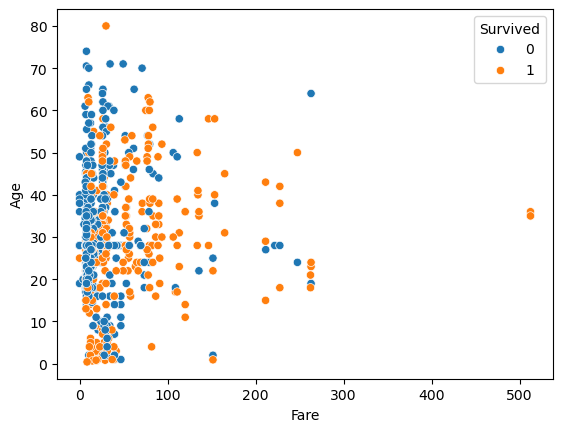

In [43]:
sns.scatterplot(y="Age",x="Fare",data=df,hue="Survived")

In [44]:
# Grouping all passengers by age
age_groups = pd.cut(df["Age"], bins=[0, 18, 30, 50, 100])

#The number of deceased passengers is calculated for each age group
group_counts = age_groups.value_counts().sort_values(ascending=False)
group_counts

Age
(18, 30]     447
(30, 50]     241
(0, 18]      139
(50, 100]     64
Name: count, dtype: int64

In [45]:
#Only the passengers who died are selected and stored in "dead_passengers" dataframe
dead_passengers = df[df["Survived"] == 0]

# Age groups are created based on the "Age" column using the pandas cut() function
age_groups = pd.cut(dead_passengers["Age"], bins=[0, 18, 30, 50, 100])

# The number of dead passengers in each age group is calculated and sorted in descending ordergroup_counts = age_groups.value_counts().sort_values(ascending=False)
group_counts



Age
(18, 30]     447
(30, 50]     241
(0, 18]      139
(50, 100]     64
Name: count, dtype: int64

In [46]:
dead_passengers = df[df["Survived"] == 1]

age_groups = pd.cut(dead_passengers["Age"], bins=[0, 18, 30, 50, 100])

group_counts = age_groups.value_counts().sort_values(ascending=False)
group_counts

Age
(18, 30]     148
(30, 50]     102
(0, 18]       70
(50, 100]     22
Name: count, dtype: int64

In [47]:
#Survival status of passengers by age and class
spca = sns.FacetGrid(df, col='Survived', row='Pclass', size=3, aspect=2)
spca.map(plt.hist, 'Age', alpha=1, bins=25)


TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

In [48]:
def box_plot(dataframe,i):
    
    sns.boxplot(x=dataframe[i])

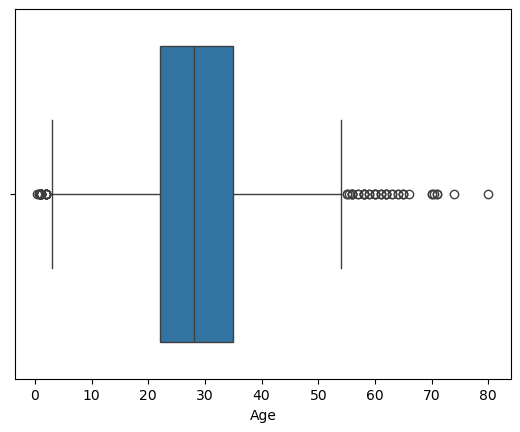

In [49]:
box_plot(df,"Age")

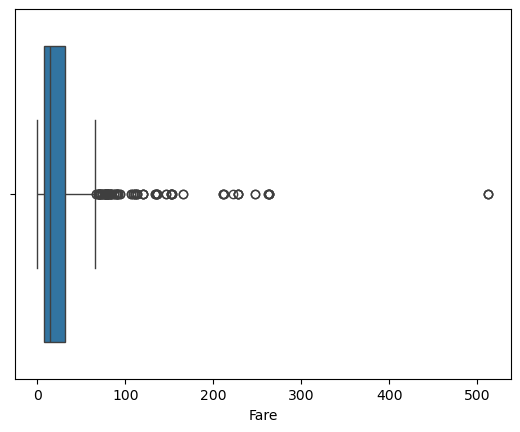

In [50]:
box_plot(df,"Fare")

Outlier

In [51]:
# Outlier Threshold'ların belirlenmesi:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    q1 = dataframe[col_name].quantile(q1)  # 1.Çeyrek
    q3 = dataframe[col_name].quantile(q3)  # 3.Çeyrek
    interquantile_range = q3 - q1  # range'i hesaplayalım
    low_limit = q1 - 0.8 * interquantile_range # low & up limit:
    up_limit = q3 + 0.5 * interquantile_range
    return low_limit, up_limit

# Outlier Değer Var mı Yok Mu:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# Outlier Değerlere Erişmek:
def grab_outliers(dataframe, col_name, index=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].head())
    else:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)])
    if index:
        outlier_index = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].index
        return outlier_index

# Outlier Değer Problemini Çözme:

# Silme ile remove_outlier çözümleme:
def remove_outlier (dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# Baskılama yöntemi:
def replace_with_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


Age for outliers

In [52]:
outlier_thresholds(df,"Age")

(-32.400000000000006, 78.0)

In [53]:
check_outlier(df,"Age") 
#aykırı olan 80 yaş için

True

In [54]:
grab_outliers(df,"Age") #aykırı olan değer

     Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
630         1       1  male  80.0      0      0  30.0        S


In [55]:
remove_outlier(df,"Age")#sadece bir satırı sildim diğer değerlerin aykırı olduğunu düşünmüyorum

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Fare for outliers

In [56]:
outlier_thresholds(df,"Fare")

(-76.65832000000002, 164.506225)

In [57]:
check_outlier(df,"Fare") 

True

In [58]:
grab_outliers(df,"Fare") #aykırı olan değer

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
27          0       1    male  19.0      3      2  263.0000        S
88          1       1  female  23.0      3      2  263.0000        S
118         0       1    male  24.0      0      1  247.5208        C
258         1       1  female  35.0      0      0  512.3292        C
299         1       1  female  50.0      0      1  247.5208        C


In [59]:
replace_with_thresholds(df,"Fare")# burada aykırı değerleri silmek yerine baskılama yöntemi kullandım

SibSp for outliers

In [60]:
outlier_thresholds(df,"SibSp")

(-2.4000000000000004, 4.5)

In [61]:
check_outlier(df,"SibSp") #aykırı değerim var

True

In [62]:
grab_outliers(df,"SibSp") #aykırı olan değer

     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
59          0       3    male  11.0      5      2  46.90        S
71          0       3  female  16.0      5      2  46.90        S
159         0       3    male  28.0      8      2  69.55        S
180         0       3  female  28.0      8      2  69.55        S
201         0       3    male  28.0      8      2  69.55        S


In [63]:
replace_with_thresholds(df,"SibSp")# burada aykırı değerleri silmek yerine baskılama yöntemi kullandım

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_31955/3350469651.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


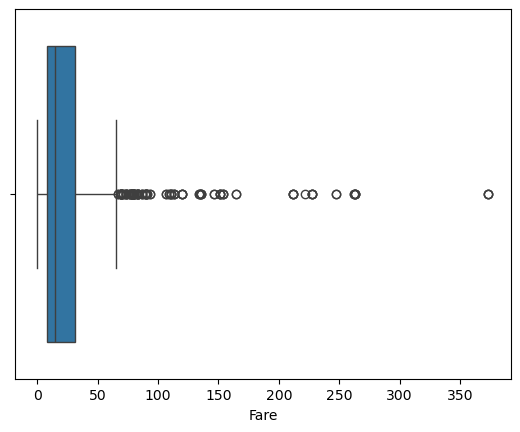

In [64]:
box_plot(df,"Fare") 
#fare için aykırı değerlerimizi baskıladık 0-500 arasında olan sıkalayı 0-350 arasına çektik

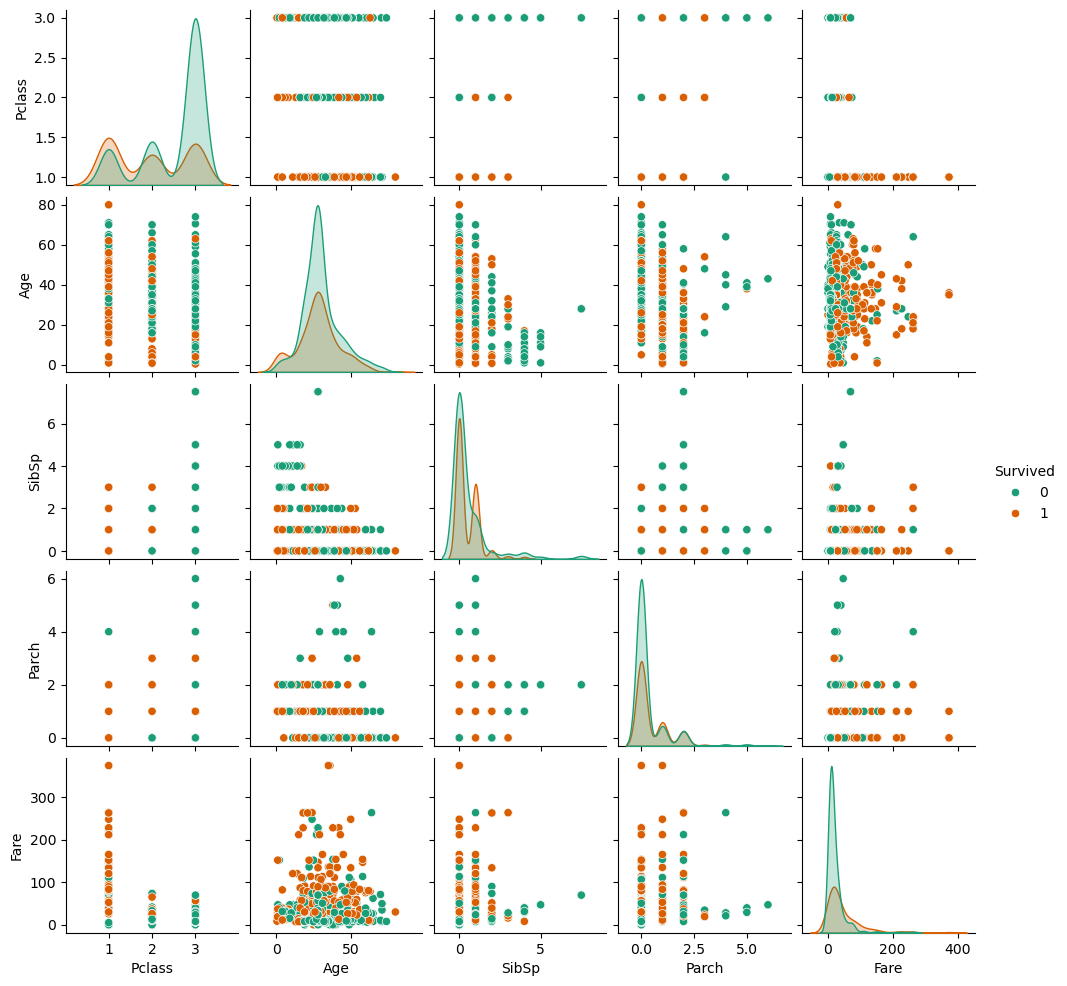

In [65]:
sns.pairplot(data=df,hue='Survived',height=2,palette="Dark2")

In [66]:
spca = sns.FacetGrid(df, col='Survived', row='Pclass', size=3, aspect=2)
spca.map(plt.hist, 'Age', alpha=1, bins=25)
spca.add_legend()
# 3.sınıf pclass ta 30 yaş aralığında hayatta kalma olasılığı çok az
#pclass 3 ile pclass 1arasında hayatta kalma oranına bakacak olursak 3. sınıfta hayatta kalmak daha azihtimal

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

5 farklı yeni dummy (kukla) değişkeni elde etme

In [67]:
#Embarked değerlerinin kukla dönüşümü için one hot Encoding kullanıyorum
#kategorik değişkenlerin ikili (binary) olarak dönüştürülmesi anlamına gelmekte ,
from sklearn import preprocessing

dummy = pd.get_dummies(df["Embarked"])   
dummy_ = df.drop(columns="Embarked", axis=1)            
df = pd.concat([dummy_, dummy],axis=1)      
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,male,22.0,1.0,0,7.2500,False,False,True
1,1,1,female,38.0,1.0,0,71.2833,True,False,False
2,1,3,female,26.0,0.0,0,7.9250,False,False,True
3,1,1,female,35.0,1.0,0,53.1000,False,False,True
4,0,3,male,35.0,0.0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0,13.0000,False,False,True
887,1,1,female,19.0,0.0,0,30.0000,False,False,True
888,0,3,female,28.0,1.0,2,23.4500,False,False,True
889,1,1,male,26.0,0.0,0,30.0000,True,False,False


In [68]:
#sex değerlerlerinin kukla dönüşümü için one hot Encoding kullanıyorum
dummy2 = pd.get_dummies(df["Sex"])   
dummy_2 = df.drop(columns="Sex", axis=1)            
df = pd.concat([dummy_2,dummy2],axis=1)               
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1.0,0,7.2500,False,False,True,False,True
1,1,1,38.0,1.0,0,71.2833,True,False,False,True,False
2,1,3,26.0,0.0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1.0,0,53.1000,False,False,True,True,False
4,0,3,35.0,0.0,0,8.0500,False,False,True,False,True


In [69]:
#sütunların isimlerini değiştirme yapabiliriz
df=df.rename(columns={0:"Male",1:"Female"})

In [70]:
df.drop(["C","Q","S"], axis=1, inplace=True)

In [71]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1.0,0,7.2500,False,True
1,1,1,38.0,1.0,0,71.2833,True,False
2,1,3,26.0,0.0,0,7.9250,True,False
3,1,1,35.0,1.0,0,53.1000,True,False
4,0,3,35.0,0.0,0,8.0500,False,True


# Machine learning

In [72]:
x = df[['Pclass',"female","male",'Age','Fare',"SibSp"]]
x.head(2) #independent variable

,Pclass,female,male,Age,Fare,SibSp
0,3,False,True,22.0,7.2500,1.0
1,1,True,False,38.0,71.2833,1.0


In [73]:
y=df["Survived"]
df.head() #The dependent variable

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1.0,0,7.2500,False,True
1,1,1,38.0,1.0,0,71.2833,True,False
2,1,3,26.0,0.0,0,7.9250,True,False
3,1,1,35.0,1.0,0,53.1000,True,False
4,0,3,35.0,0.0,0,8.0500,False,True


In [74]:
# train and test divided
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.12, random_state=0)

In [75]:
from sklearn.linear_model import LogisticRegression

log_regresyon=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)

log_regresyon.fit(x_train,y_train)
log_regresyon.score(x_test,y_test)

0.8037383177570093

In [76]:
#scaling of data - standardization
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [77]:
x_train

array([[ 0.80699853,  1.3604812 , -1.3604812 ,  0.88029346,  0.19708196,
        -0.47170312],
       [-0.40041912, -0.73503405,  0.73503405, -0.34995484, -0.10771502,
         0.46099611],
       [ 0.80699853,  1.3604812 , -1.3604812 , -0.11928328, -0.34153189,
         0.46099611],
       ...,
       [ 0.80699853, -0.73503405,  0.73503405, -0.11928328, -0.51448288,
        -0.47170312],
       [ 0.80699853,  1.3604812 , -1.3604812 ,  0.49584087, -0.29922217,
         0.46099611],
       [-0.40041912, -0.73503405,  0.73503405,  2.34121331,  0.18177252,
         0.46099611]])

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def print_metrics(df):
    print("Percentage of Success Value: {}%".format(accuracy_score(y_test, y_pred)*100))
    print("Accuracy Value: {}".format(accuracy_score(y_test, y_pred)))
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))


In [79]:
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,-0.789272,0.827377,-0.565736,0.446931,-0.473674,-0.536586,-0.737695,0.737695
1,1.266990,-1.566107,0.663861,0.446931,-0.473674,0.866593,1.355574,-1.355574
2,1.266990,0.827377,-0.258337,-0.482393,-0.473674,-0.521794,1.355574,-1.355574
3,1.266990,-1.566107,0.433312,0.446931,-0.473674,0.468137,1.355574,-1.355574
4,-0.789272,0.827377,0.433312,-0.482393,-0.473674,-0.519055,-0.737695,0.737695
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.482393,-0.473674,-0.410584,-0.737695,0.737695
887,1.266990,-1.566107,-0.796286,-0.482393,-0.473674,-0.038059,1.355574,-1.355574
888,-0.789272,0.827377,-0.104637,0.446931,2.008933,-0.181591,1.355574,-1.355574
889,1.266990,-1.566107,-0.258337,-0.482393,-0.473674,-0.038059,-0.737695,0.737695


In [80]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1.0,0,7.2500,False,True
1,1,1,38.0,1.0,0,71.2833,True,False
2,1,3,26.0,0.0,0,7.9250,True,False
3,1,1,35.0,1.0,0,53.1000,True,False
4,0,3,35.0,0.0,0,8.0500,False,True


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# The best success was achieved when k=3.
score=[]
for k in range(1,10,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
score

[0.7663551401869159,
 0.8037383177570093,
 0.794392523364486,
 0.794392523364486,
 0.8037383177570093]

In [82]:
# GaussianNB and BernoulliNB 

from sklearn.naive_bayes import GaussianNB

gauss_ = GaussianNB()
gauss_.fit(x_train, y_train)

y_pred = gauss_.predict(x_test)

print_metrics(df)

Percentage of Success Value: 80.37383177570094%
Accuracy Value: 0.8037383177570093
Precision: 0.816
Recall: 0.689
F1 Score: 0.747


In [83]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rd_forest = RandomForestClassifier(n_estimators=100)
rd_forest.fit(x_train, y_train)

y_pred = rd_forest.predict(x_test)

print_metrics(df)

Percentage of Success Value: 85.98130841121495%
Accuracy Value: 0.8598130841121495
Precision: 0.895
Recall: 0.756
F1 Score: 0.819


Accuracy, sınıflandırıcının doğru tahmin etme oranını ölçen bir metrik olarak tanımlanır ve aşağıdaki formülle hesaplanır:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Burada, TP (True Positive) doğru pozitif sınıflandırmaların sayısını, TN (True Negative) doğru negatif sınıflandırmaların sayısını, FP (False Positive) yanlış pozitif sınıflandırmaların sayısını ve FN (False Negative) yanlış negatif sınıflandırmaların sayısını temsil eder.

Precision, tüm pozitif tahminlerin kaçının doğru olduğunu ölçen bir metriktir ve aşağıdaki formülle hesaplanır:

Precision = TP / (TP + FP)

Recall, pozitif sınıfların kaçının doğru şekilde tahmin edildiğini ölçen bir metriktir ve aşağıdaki formülle hesaplanır:

Recall = TP / (TP + FN)

F1 Score, Precision ve Recall metriklerinin harmonik ortalaması olarak tanımlanır ve aşağıdaki formülle hesaplanır:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Burada, Precision ve Recall metriklerinin değerleri, doğru pozitif (TP), yanlış pozitif (FP) ve yanlış negatif (FN) tahminlerin sayılarına göre hesaplanır.

Random Forest, KNN ve Naive Bayes algoritmaları arasından en iyi başarı oranını elde eden algoritma Random Forest olarak belirtilmiştir. Başarı oranı %85.04 olarak hesaplanmıştır.